In [229]:
import sys
import glob as glob
import numpy as np

sys.path.append('../')

# Interferon

- take in Remedy data products for VP and preform:
    - allow for user run custom sky subtraction
    - dither normalization from guider frames 
    - flux calbiration using standard stars
    - build data cube - interpolate over dither set while conserving flux
    - spectral extraction over aperature 
    - emission line fitting using Bayesian scheme
    - build emission line images 
    - normalize overlapping fields 

# Define data paths

In [2]:
data_path = '/Volumes/B_SS/VIRUS_P/VP_reduction/20210411_test/redux'
guider_path = '/Volumes/B_SS/VIRUS_P/VP_reduction/20210411_test/guider'
dith_file = '../VP_config/dith_vp_6subdither.csv'
cen_file = '../VP_config/IFUcen_VP_new_27m.csv'

# Auto build data cubes from Remedy products

In [4]:
from auto_VP_run import VP_run

vp1 = VP_run(data_path, fits_ext=0, guider_path=guider_path, 
             dith_file=dith_file, cen_file=cen_file)

vp1.run_all_dithers()

# Working with individual objects 

    1) Guider object
    2) VIRUS-P frame (one dither) object
    3) Dither set object
    4) Data cube object
    5) Spectrum object

## Example of 1) guider object

In [5]:
import guider_observations as go

In [6]:
guid = go.guider_observations(guider_path)

BUILD guider observation: [GUIDER]


In [7]:
guid.guider_df.head(5)

,filename,obs_datetime,exptime(s)
0,/Volumes/B_SS/VIRUS_P/VP_reduction/20210411_te...,2021-04-11 03:00:32.350000,4.0
1,/Volumes/B_SS/VIRUS_P/VP_reduction/20210411_te...,2021-04-11 03:00:36.850000,4.0
2,/Volumes/B_SS/VIRUS_P/VP_reduction/20210411_te...,2021-04-11 03:00:41.340000,4.0
3,/Volumes/B_SS/VIRUS_P/VP_reduction/20210411_te...,2021-04-11 03:00:45.780000,4.0
4,/Volumes/B_SS/VIRUS_P/VP_reduction/20210411_te...,2021-04-11 03:00:50.240000,4.0


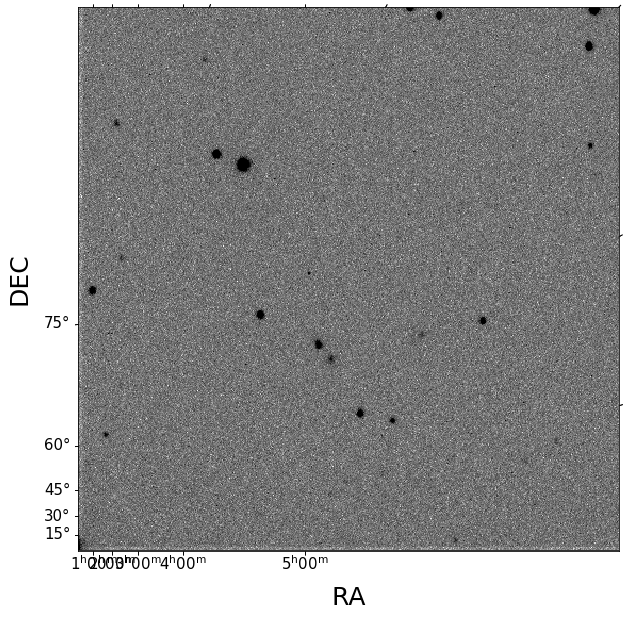

In [8]:
guid.inspect_guider_frame(500)

In [9]:
ex_source_df = guid.find_guide_stars(500)
ex_source_df

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
0,1,295.044665,122.119870,0.688442,-0.055529,0.026742,121,0.0,3212.0,2.197449,-0.854797
1,2,264.549897,128.818562,0.799170,-0.026961,0.067399,121,0.0,3550.0,6.439037,-2.022052
2,3,225.401261,193.200315,0.780606,-0.010354,0.170897,121,0.0,3462.0,5.266289,-1.803762
3,4,379.672635,215.662352,0.721374,0.066188,0.156133,121,0.0,3445.0,5.521469,-1.855137
4,5,170.821696,221.373281,0.772697,-0.018857,0.107706,121,0.0,3883.0,11.192872,-2.622354
5,6,13.039326,244.219355,0.778895,0.083613,0.134523,121,0.0,3632.0,7.699953,-2.216220
6,7,154.638421,362.439321,0.687240,0.000928,0.133420,121,0.0,13101.0,148.901543,-5.432248
7,8,129.550517,372.382768,0.664425,-0.039195,0.114316,121,0.0,4434.0,21.120671,-3.311769
8,9,480.729110,380.445081,0.648907,0.018928,0.171624,121,0.0,3179.0,1.837539,-0.660591
9,10,479.323231,473.783537,0.603589,0.074731,0.271650,121,0.0,3570.0,8.166508,-2.280091


In [10]:
ex_source_df2 = guid.measure_guide_star_params(500, ex_source_df)
ex_source_df2

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag,xcentroid_fit,ycentroid_fit,fwhm(pixels),flux_fit,mag_fit,fwhm(arcseconds)
0,1,295.044665,122.119870,0.688442,-0.055529,0.026742,121,0.0,3212.0,2.197449,-0.854797,295.011140,122.085756,3.796209,627.049545,-6.993255,1.936066
1,2,264.549897,128.818562,0.799170,-0.026961,0.067399,121,0.0,3550.0,6.439037,-2.022052,264.512820,128.798580,3.546799,1760.413085,-8.114036,1.808867
2,3,225.401261,193.200315,0.780606,-0.010354,0.170897,121,0.0,3462.0,5.266289,-1.803762,225.383610,193.154829,4.003350,1648.806621,-8.042924,2.041708
3,4,379.672635,215.662352,0.721374,0.066188,0.156133,121,0.0,3445.0,5.521469,-1.855137,379.682784,215.598096,3.580999,1478.338534,-7.924435,1.826309
4,5,170.821696,221.373281,0.772697,-0.018857,0.107706,121,0.0,3883.0,11.192872,-2.622354,170.793548,221.374831,3.665440,3068.645694,-8.717367,1.869374
5,6,13.039326,244.219355,0.778895,0.083613,0.134523,121,0.0,3632.0,7.699953,-2.216220,13.039289,244.214370,3.754453,2135.401195,-8.323699,1.914771
6,7,154.638421,362.439321,0.687240,0.000928,0.133420,121,0.0,13101.0,148.901543,-5.432248,154.625494,362.438698,3.847267,43853.852404,-11.605019,1.962106
7,8,129.550517,372.382768,0.664425,-0.039195,0.114316,121,0.0,4434.0,21.120671,-3.311769,129.531425,372.390593,3.698286,5900.317860,-9.427189,1.886126
8,9,480.729110,380.445081,0.648907,0.018928,0.171624,121,0.0,3179.0,1.837539,-0.660591,480.695570,380.432911,3.674977,484.237956,-6.712647,1.874238
9,10,479.323231,473.783537,0.603589,0.074731,0.271650,121,0.0,3570.0,8.166508,-2.280091,479.297195,473.778869,4.206806,2627.873959,-8.549011,2.145471


## Example of 2) VIRUS-P frame object

In [11]:
import VP_fits_frame as vpf

In [12]:
file_ex = '/Volumes/B_SS/VIRUS_P/VP_reduction/20210411/redux/COOLJ0931_dither_1_20210411T030846_multi.fits'

fits_ex = vpf.VP_fits_frame(file_ex, 0, cen_file=cen_file, guide_obs=guid)


BUILD VP science frame [COOLJ0931_dither_1_20210411T030846_multi.fits][EXT:0]


In [13]:
fits_ex.dith_num

1

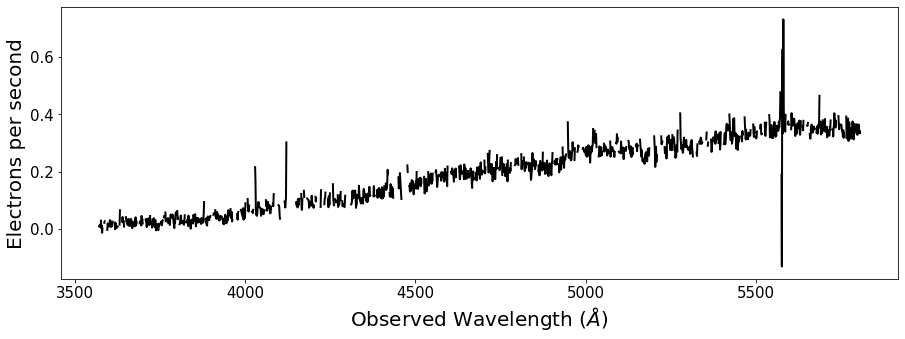

In [14]:
fits_ex.build_frame_sum_spec(plot=True)

## Example of 3) dither observations object

In [15]:
import dither_observations as do

In [16]:
file_list = glob.glob(data_path+'/COOLJ0931*_multi.fits')

fits_1 = vpf.VP_fits_frame(file_list[0], 0, cen_file=cen_file, guide_obs=guid)
fits_2 = vpf.VP_fits_frame(file_list[1], 0, cen_file=cen_file, guide_obs=guid)
fits_3 = vpf.VP_fits_frame(file_list[2], 0, cen_file=cen_file, guide_obs=guid)
fits_4 = vpf.VP_fits_frame(file_list[3], 0, cen_file=cen_file, guide_obs=guid)
fits_5 = vpf.VP_fits_frame(file_list[4], 0, cen_file=cen_file, guide_obs=guid)
fits_6 = vpf.VP_fits_frame(file_list[5], 0, cen_file=cen_file, guide_obs=guid)

file_obj_lis = [fits_1, fits_2, fits_3, fits_4, fits_5, fits_6]

# file_obj_lis = []
# for f in file_list:
#     fits_ex = vpf.VP_fits_frame(f, 0, cen_file=cen_file, guide_obs=guid)
#     file_obj_lis.append(fits_ex)

BUILD VP science frame [COOLJ0931_dither_1_20210411T030846_multi.fits][EXT:0]
BUILD VP science frame [COOLJ0931_dither_2_20210411T032522_multi.fits][EXT:0]
BUILD VP science frame [COOLJ0931_dither_3_20210411T034159_multi.fits][EXT:0]
BUILD VP science frame [COOLJ0931_dither_4_20210411T035835_multi.fits][EXT:0]
BUILD VP science frame [COOLJ0931_dither_5_20210411T041511_multi.fits][EXT:0]
BUILD VP science frame [COOLJ0931_dither_6_20210411T043147_multi.fits][EXT:0]


In [17]:
fits_1.fits_ext

0

In [18]:
dith = do.dither_observation(file_obj_lis, dither_group_id=1, dith_file=dith_file)

BUILD 6 dither observation: [DITHOBS:1]


In [19]:
dith.normalize_dithers(guid)

 [DITHOBS:1] build normalized dithers
GUIDE [ 111  112  113 ... 5098 5099 5100]
OVERWRITING fits extension: [COOLJ0931_dither_1_20210411T030846_multi.fits][EXT:dithnorm]
BUILDING new fits extension: [COOLJ0931_dither_2_20210411T032522_multi.fits][EXT:dithnorm]
BUILDING new fits extension: [COOLJ0931_dither_3_20210411T034159_multi.fits][EXT:dithnorm]
BUILDING new fits extension: [COOLJ0931_dither_4_20210411T035835_multi.fits][EXT:dithnorm]
BUILDING new fits extension: [COOLJ0931_dither_5_20210411T041511_multi.fits][EXT:dithnorm]
BUILDING new fits extension: [COOLJ0931_dither_6_20210411T043147_multi.fits][EXT:dithnorm]


In [20]:
for i in dith.VP_frames:
    print(i.dith_num, i.seeing, i.dithnorm, i.fits_ext)

1 2.414974440469334 0.9689334018819774 dithnorm
2 2.2066830668599393 0.9835917946393833 dithnorm
3 2.0524776279842105 1.0 dithnorm
4 1.9797851224558247 0.9983360918629792 dithnorm
5 2.1902447891810595 0.9633061959938931 dithnorm
6 2.0516773838224456 0.9786423466544407 dithnorm


In [21]:
dith.write_data_cube()

 [DITHOBS:1] build common wavelength solution
 [DITHOBS:1] build master dither set files
 [DITHOBS:1] build data cube and error cube
Creating 3D WCS
 [DITHOBS:1] build fits cube files


## Example of 4) data cube object

In [52]:
import data_cube as dc

In [54]:
cube_file = data_path+'/COOLJ0931_dither_1_20210411T030846_multi_data_cube_1.fits'
cube_err_file = data_path+'/COOLJ0931_dither_1_20210411T030846_multi_data_cube_1_err.fits'

cube_1 = dc.cube(cube_file, err_cube_file=cube_err_file)

In [60]:
sum_frame = cube_1.collapse_frame()

In [233]:
cube_wcs = dith.cube_wcs
wcs_im = WCS(dith.cube_wcs.to_header(), naxis=2)
print(cube_wcs.naxis, wcs_im.naxis)

3 2


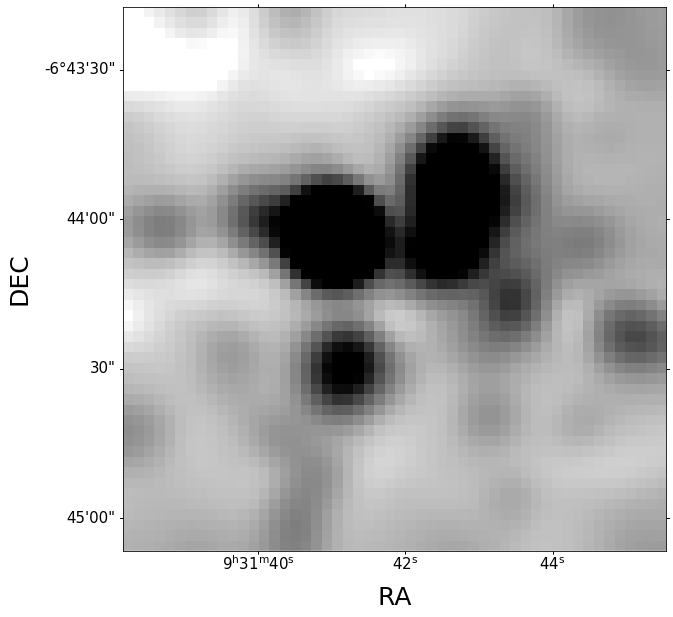

In [230]:
outfile = data_path+'/COOLJ0931_dither_1_20210411T030846_multi_data_collapse_cube.png'

im.plot_frame(sum_frame, wcs=wcs_im, save=True, outfile=outfile) #vmin=-0.3, vmax=2.5


## Example of 5) spectrum object

In [22]:
import IFU_spectrum as ifu_spec

In [23]:
fits_1.fits_ext

'dithnorm'

In [28]:
fits_1.filename

'/Volumes/B_SS/VIRUS_P/VP_reduction/20210411_test/redux/COOLJ0931_dither_1_20210411T030846_multi.fits'

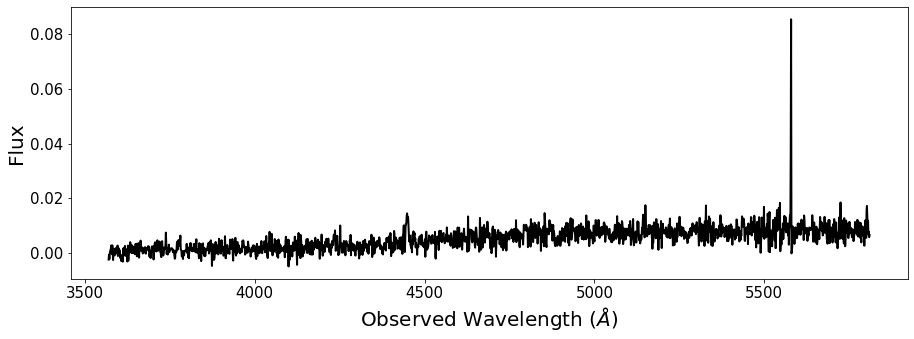

In [51]:
ex_spec = ifu_spec.spectrum(fits_1.dat[87], fits_1.wave, z=np.NaN, obj_name=fits_1.object)
ex_spec.plot_spec()